In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 


In [ ]:
from fastai.vision.all import *
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = Path('gdrive/My Drive/Colab Notebooks/zindi')

In [ ]:
df = pd.read_csv(path/"Train.csv")

In [ ]:
tfms = setup_aug_tfms([Contrast(p=1., max_lighting=0.8)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=tfms)

/usr/local/lib/python3.6/dist-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=7.585775847473997e-07)

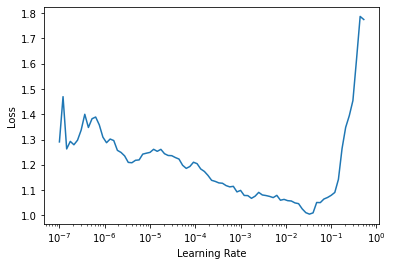

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, slice(8e-07, 3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.218009,1.164086,0.657343,00:16
1,0.974241,0.891838,0.734266,00:17
2,0.791726,0.640055,0.776224,00:16
3,0.707953,0.529480,0.818182,00:16
4,0.603346,0.557673,0.804196,00:16


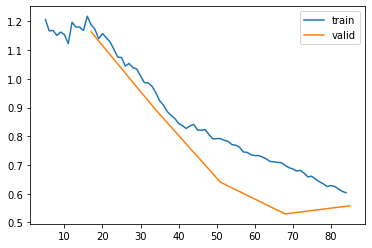

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('res50_stage-1')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/res50_stage-1.pth')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.737800812406931e-05)

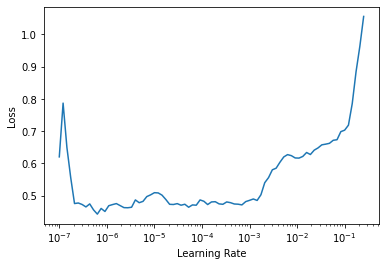

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(12, slice(1.737800812406931e-05, 6.309573450380412e-08))

epoch,train_loss,valid_loss,accuracy,time
0,0.469171,0.548520,0.811189,00:20
1,0.461259,0.537103,0.818182,00:19
2,0.460344,0.554826,0.825175,00:19
3,0.444619,0.668042,0.797203,00:19
4,0.431158,0.555063,0.839161,00:19
5,0.446522,0.497149,0.825175,00:19
6,0.417311,0.506237,0.832168,00:19
7,0.418235,0.525259,0.839161,00:19
8,0.418996,0.539672,0.818182,00:19
9,0.423585,0.483062,0.825175,00:19


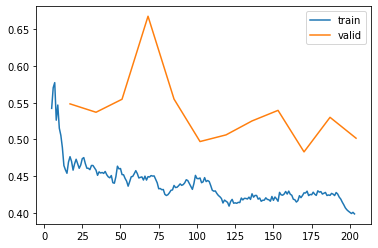

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('res50_stage-2')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/res50_stage-2.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=1., max_lighting=0.9)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=tfms)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.load('res50_stage-2')
# learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 5e-7)

epoch,train_loss,valid_loss,accuracy,time
0,0.438769,0.471248,0.825175,00:16
1,0.455876,0.475892,0.846154,00:17
2,0.441937,0.475281,0.846154,00:17
3,0.446573,0.478686,0.839161,00:16
4,0.450497,0.466368,0.832168,00:16


In [ ]:
learn.save('res50_stage-3')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/res50_stage-3.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=1., max_lighting=0.9)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=RandomResizedCrop(340, min_scale=0.2))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


/usr/local/lib/python3.6/dist-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


SuggestedLRs(lr_min=0.003981071710586548, lr_steep=5.754399353463668e-06)

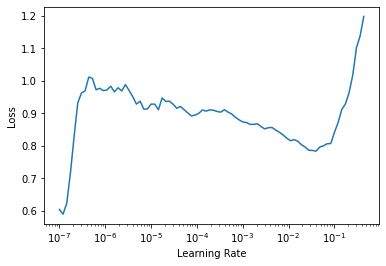

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.load('res50_stage-3')
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, lr_max=slice(6e-6, 4e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.932175,1.003140,0.727273,00:27
1,0.856765,0.801299,0.741259,00:11
2,0.779196,0.682465,0.734266,00:11
3,0.724873,0.769671,0.741259,00:11
4,0.680296,0.638148,0.804196,00:11
5,0.646892,0.733828,0.762238,00:11
6,0.620254,0.687862,0.776224,00:10
7,0.610485,0.663067,0.727273,00:11
8,0.589720,0.668675,0.741259,00:11
9,0.568801,0.561566,0.769231,00:11


In [ ]:
learn.save('res50_stage-4')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/res50_stage-4.pth')

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.load('res50_stage-4')
# learn.lr_find()

In [ ]:
learn.unfreeze()
learn.lr_find()

RuntimeError: ignored

In [ ]:
learn.fit_one_cycle(20, 1.2e-7)

RuntimeError: ignored

In [ ]:
import gc
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
tfms = setup_aug_tfms([Contrast(p=1., max_lighting=.5, draw=1.1)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, bs=32,
                               item_tfms=[Resize(340)], batch_tfms=aug_transforms(xtra_tfms=tfms))

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=2.75422871709452e-06)

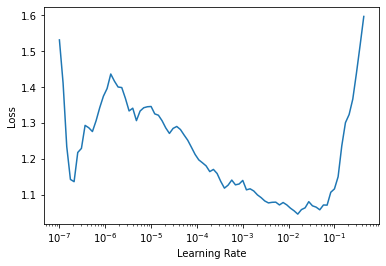

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.lr_find()
# learn.fit_one_cycle(5, 3e-3)

In [ ]:
learn.fit_one_cycle(5, slice(3e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.083208,2.955255,0.447552,00:15
1,0.945556,2.233964,0.510490,00:15
2,0.898688,1.627760,0.650350,00:15
3,0.806910,1.011317,0.720280,00:15
4,0.730093,0.810911,0.755245,00:15


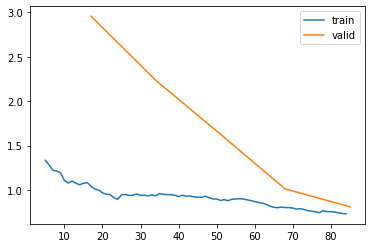

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.lr

0.001

In [ ]:
learn.save('stage-1_slice(3e-6, 1e-3)')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/stage-1_slice(3e-6, 1e-3).pth')

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=9.999999747378752e-06)

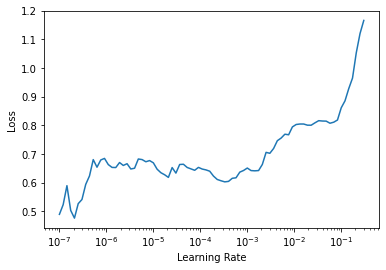

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(12, slice(1e-5, 5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.683271,0.758225,0.755245,00:18
1,0.630446,0.766579,0.769231,00:18
2,0.598962,0.696272,0.825175,00:18
3,0.542295,0.900828,0.748252,00:18
4,0.522205,0.755243,0.790210,00:18
5,0.481086,0.642545,0.839161,00:18
6,0.416636,0.811461,0.762238,00:18
7,0.372738,0.606804,0.846154,00:18
8,0.345653,0.605183,0.832168,00:18
9,0.312748,0.537124,0.846154,00:18


In [ ]:
learn.save('stage-2_slice(1e-5, 5e-4)')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/stage-2_slice(1e-5, 5e-4).pth')

In [ ]:
# tfms = setup_aug_tfms([Contrast(p=1., max_lighting=.7, draw=1.6),
#                        Brightness(p=1., max_lighting=0.3, draw=0.2),
#                        Zoom(min_zoom=1.1,  max_zoom=1.1, p=1., draw=1.5, draw_x=0.5, draw_y=0.5),
#                        Rotate(max_deg=10, p=0.5)]) 
# dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, bs=32,
#                                item_tfms=[Resize(340)], batch_tfms=tfms)

tfms = setup_aug_tfms([Contrast(p=1., max_lighting=.5, draw=1.1),
                       Brightness(p=1., max_lighting=0.3, draw=0.2)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, bs=32,
                               item_tfms=[Resize(450)], batch_tfms=aug_transforms(xtra_tfms=tfms))

NameError: ignored

In [ ]:
import gc
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
dls.train.show_batch(max_n=20, nrows=4)

SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=7.585775847473997e-07)

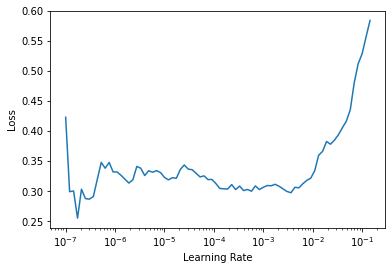

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.load('stage-2_slice(1e-5, 5e-4)')
# learn.freeze_to(-1) #cnn_learner returns forzen layers by default
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, 3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.397593,0.638728,0.818182,00:24
1,0.344626,0.629606,0.832168,00:24
2,0.305948,0.639275,0.825175,00:24


SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=7.585775847473997e-07)

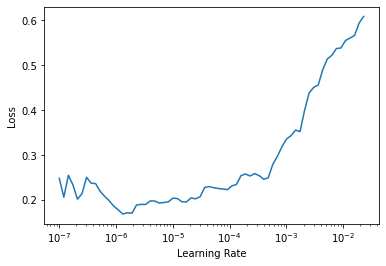

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, slice(7.5e-07, 1.3e-07))

epoch,train_loss,valid_loss,accuracy,time
0,0.240732,0.674866,0.811189,00:29
1,0.250740,0.618407,0.825175,00:30
2,0.248080,0.699109,0.804196,00:29
3,0.248242,0.699274,0.811189,00:29
4,0.246097,0.681822,0.818182,00:29
5,0.248362,0.629149,0.818182,00:29
6,0.246197,0.650995,0.818182,00:29
7,0.262049,0.661012,0.811189,00:29
8,0.244380,0.655494,0.825175,00:29
9,0.248252,0.660545,0.818182,00:29


In [ ]:
learn.save('stage-3_slice(7.5e-07, 1.3e-07)')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/stage-3_slice(7.5e-07, 1.3e-07).pth')

In [ ]:
import gc
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# tfms = setup_aug_tfms([Contrast(p=1., max_lighting=.7, draw=1.6),
#                        Brightness(p=1., max_lighting=0.3, draw=0.2),
#                        Zoom(min_zoom=1.1,  max_zoom=1.1, p=1., draw=1.5, draw_x=0.5, draw_y=0.5),
#                        Rotate(max_deg=10, p=0.5)]) 
# dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, bs=32,
#                                item_tfms=[Resize(450)], batch_tfms=tfms)

tfms = setup_aug_tfms([Contrast(p=1., max_lighting=.5, draw=1.1),
                       Brightness(p=1., max_lighting=0.3, draw=0.2)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, bs=32,
                               item_tfms=[Resize(450)], batch_tfms=aug_transforms())


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775847473997e-07)

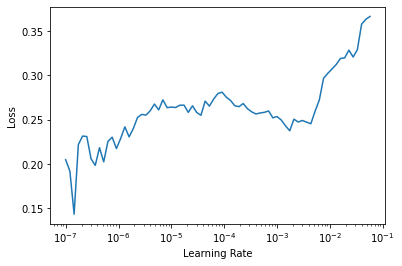

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.load('stage-2_slice(1e-5, 5e-4)')
# learn.freeze_to(-1)
learn.lr_find()

In [ ]:
learn.fine_tune(10, lr_max=1/9*1e-3, freeze_epochs=2)

TypeError: ignored

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(8e-7))

epoch,train_loss,valid_loss,accuracy,time
0,0.222584,0.669130,0.811189,00:31
1,0.239197,0.619700,0.818182,00:31
2,0.252114,0.620435,0.804196,00:31
3,0.240493,0.637080,0.797203,00:31
4,0.232498,0.682733,0.783217,00:31
5,0.228338,0.694911,0.797203,00:31
6,0.235011,0.661109,0.804196,00:31
7,0.217580,0.623632,0.811189,00:31
8,0.215850,0.650711,0.790210,00:31
9,0.219859,0.679793,0.790210,00:31


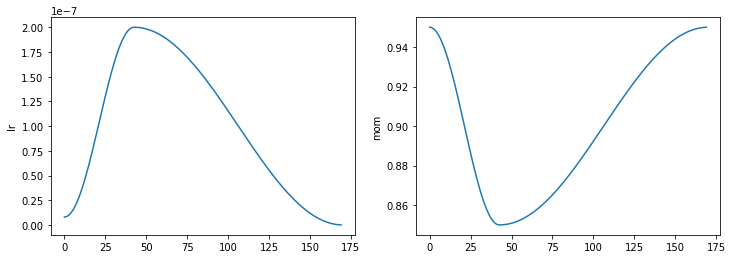

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(340), bs=32, batch_tfms=tfms)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(340), bs=32, batch_tfms=tfms)

epoch,train_loss,valid_loss,accuracy,time
0,1.080989,2.839561,0.479070,02:18


epoch,train_loss,valid_loss,accuracy,time
0,0.799699,1.876774,0.562791,00:12
1,0.585516,1.970017,0.646512,00:11
2,0.485573,1.008949,0.786047,00:11
3,0.368005,0.771438,0.790698,00:11
4,0.291164,0.640357,0.809302,00:11


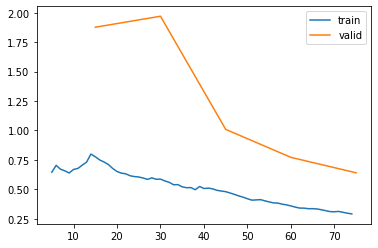

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('TB_1')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_1.pth')

SuggestedLRs(lr_min=4.365158383734525e-06, lr_steep=1.3182567499825382e-06)

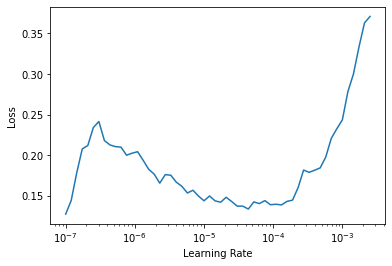

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(1.3182567499825382e-06, 4.365158383734525e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.358095,1.565333,0.730233,00:11
1,0.655456,5.946332,0.595349,00:11
2,0.658647,1.789778,0.618605,00:11
3,0.579389,0.750076,0.758140,00:11
4,0.550912,1.647380,0.813953,00:11
5,0.514577,0.524937,0.804651,00:11
6,0.438491,0.419006,0.837209,00:11
7,0.356025,0.304083,0.897674,00:12
8,0.287397,0.316250,0.860465,00:11
9,0.242755,0.340716,0.860465,00:11


In [ ]:
learn.save('TB_2')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_2.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(450), bs=32, batch_tfms=tfms)

# dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
#                                item_tfms=Resize(450), bs=32, batch_tfms=aug_transforms(mult=2))

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.load('TB_1')
# learn.freeze_to(2)

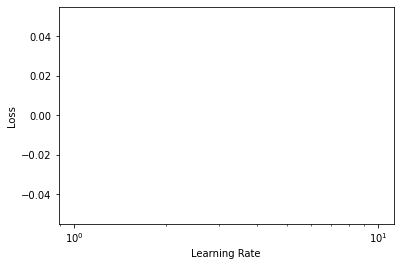

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fine_tune(10, lr_mult=10)

epoch,train_loss,valid_loss,accuracy,time
0,0.425768,0.706499,0.811189,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.518132,2.582993,0.615385,00:17
1,0.474336,0.771867,0.832168,00:17
2,0.483053,0.994789,0.769231,00:17
3,0.393815,0.979056,0.853147,00:17
4,0.332663,0.562196,0.881119,00:17
5,0.267601,0.425847,0.895105,00:17
6,0.224542,0.487134,0.874126,00:17
7,0.172992,0.488705,0.874126,00:17
8,0.129925,0.516217,0.881119,00:17
9,0.099539,0.544356,0.895105,00:17


In [ ]:
learn.save('TB_3')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_3.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(450), bs=32, batch_tfms=tfms)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.load('TB_3')
# learn.freeze_to(2)

SuggestedLRs(lr_min=1.3182566908653825e-05, lr_steep=3.311311274956097e-06)

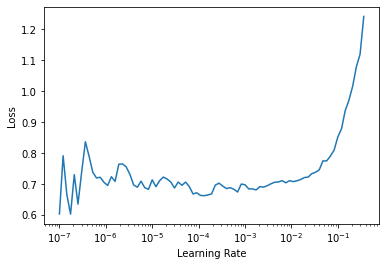

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fine_tune(10, base_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.722492,0.813056,0.853147,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.472690,0.968540,0.818182,00:17
1,0.427600,0.899902,0.790210,00:17
2,0.412681,0.785003,0.790210,00:17
3,0.410918,0.793488,0.804196,00:17
4,0.374267,0.740176,0.825175,00:17
5,0.332989,0.661840,0.839161,00:17
6,0.311286,0.500012,0.853147,00:17
7,0.304170,0.437088,0.867133,00:17
8,0.285083,0.502859,0.853147,00:17
9,0.258895,0.446851,0.860140,00:17


In [ ]:
learn.save('TB_4')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_4.pth')

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

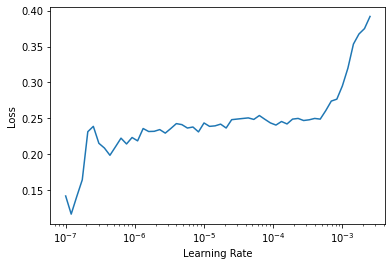

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, slice(6e-7, 2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.240696,0.462224,0.853147,00:17
1,0.238723,0.427436,0.867133,00:17
2,0.255179,0.425124,0.853147,00:17
3,0.245747,0.422765,0.860140,00:17
4,0.252501,0.395102,0.888112,00:17
5,0.239432,0.420121,0.867133,00:17
6,0.225308,0.405450,0.867133,00:17
7,0.221534,0.395509,0.874126,00:17
8,0.214199,0.427751,0.867133,00:17
9,0.204988,0.416719,0.867133,00:17


In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)]) 
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=aug_transforms(mult=2))

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.load('TB_4')
# learn.freeze_to(2)

SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=7.585775847473997e-07)

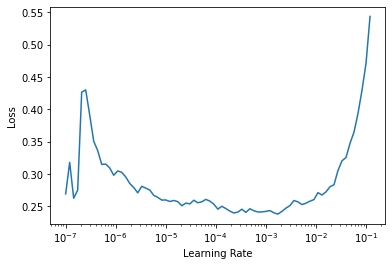

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(12, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.252471,0.536367,0.867133,00:18
1,0.263249,0.684068,0.839161,00:16
2,0.257937,0.599152,0.832168,00:16
3,0.268659,0.442019,0.874126,00:16
4,0.249149,0.557993,0.860140,00:16
5,0.225260,0.527807,0.860140,00:16
6,0.237670,0.731983,0.825175,00:16
7,0.227745,0.496295,0.860140,00:16
8,0.204557,0.567287,0.860140,00:16
9,0.206078,0.552836,0.881119,00:16


In [ ]:
learn.save('TB_5')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_5.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=aug_transforms(mult=2, flip_vert=True,xtra_tfms=tfms))

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.9054607491852948e-06)

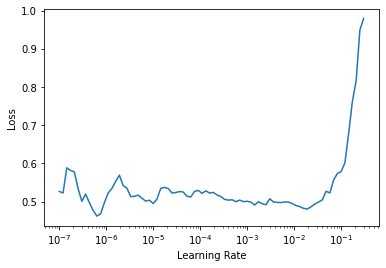

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate])
learn.load('TB_5')
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, slice(2e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.538661,0.323240,0.883721,0.116279,00:18
1,0.506106,0.883695,0.869767,0.130233,00:16
2,0.520239,0.588559,0.897674,0.102326,00:16
3,0.516544,0.829915,0.893023,0.106977,00:16
4,0.539204,0.645811,0.837209,0.162791,00:16
5,0.502498,0.630296,0.883721,0.116279,00:16
6,0.464247,0.460555,0.902326,0.097674,00:16
7,0.421734,0.477873,0.906977,0.093023,00:16
8,0.380464,0.455746,0.906977,0.093023,00:16
9,0.350780,0.475323,0.897674,0.102326,00:16


In [ ]:
learn.save('TB_6')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_6.pth')

In [ ]:
learn.freeze_to(-1)
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.330913,0.567583,0.897674,0.102326,00:16
1,0.328130,0.495494,0.883721,0.116279,00:16
2,0.319232,0.472615,0.893023,0.106977,00:16
3,0.316655,0.477297,0.906977,0.093023,00:16
4,0.307846,0.450607,0.911628,0.088372,00:16


In [ ]:
learn.save('TB_7')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_7.pth')

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=3.981071586167673e-06)

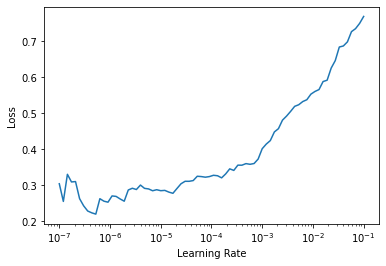

In [ ]:
learn.unfreeze()
learn.lr_find()

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

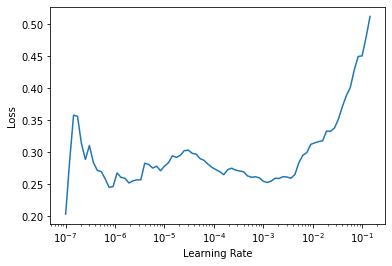

In [ ]:
learn.freeze_to(-1)
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, slice(2e-4, 2e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.273000,0.433435,0.911628,0.088372,00:16
1,0.282211,0.421987,0.911628,0.088372,00:16
2,0.289393,0.446084,0.888372,0.111628,00:16
3,0.309909,0.404250,0.879070,0.120930,00:16
4,0.310398,0.364466,0.902326,0.097674,00:16
5,0.300588,0.380477,0.906977,0.093023,00:16
6,0.299246,0.337890,0.916279,0.083721,00:16
7,0.290361,0.330718,0.911628,0.088372,00:16
8,0.277121,0.346320,0.916279,0.083721,00:16
9,0.265642,0.326813,0.906977,0.093023,00:16


In [ ]:
learn.save('TB_8')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_8.pth')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=8.31763736641733e-06)

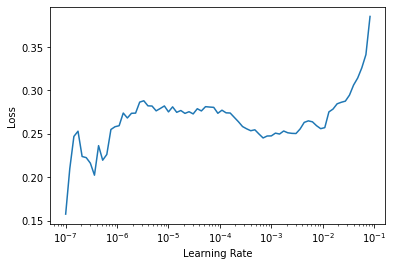

In [ ]:
learn.lr_find()

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=aug_transforms(mult=1, flip_vert=True, xtra_tfms=tfms))

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=4.786300905834651e-06)

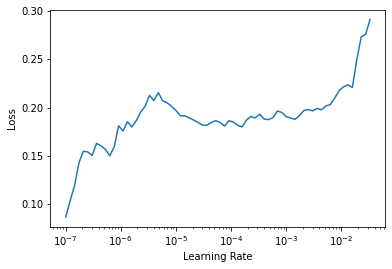

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate])
learn.load('TB_8')
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, slice(5e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.179151,0.315619,0.920930,0.079070,00:16
1,0.184231,0.320435,0.920930,0.079070,00:16
2,0.189157,0.314068,0.911628,0.088372,00:16
3,0.168085,0.319115,0.920930,0.079070,00:16
4,0.172300,0.333773,0.916279,0.083721,00:16
5,0.172346,0.328185,0.920930,0.079070,00:16
6,0.173029,0.332448,0.920930,0.079070,00:16
7,0.172339,0.319880,0.916279,0.083721,00:16
8,0.173499,0.325110,0.920930,0.079070,00:16
9,0.175581,0.326106,0.911628,0.088372,00:16


In [ ]:
learn.save('TB_9')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_9.pth')

In [ ]:
import gc
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=aug_transforms(mult=2, flip_vert=True))

SuggestedLRs(lr_min=5.754399353463669e-07, lr_steep=1.9054607491852948e-06)

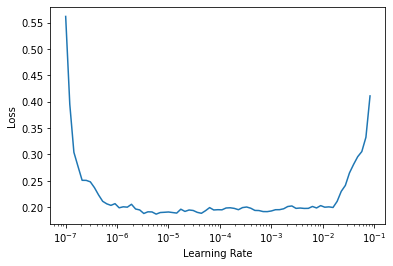

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate])
learn.load('TB_9')
# learn.freeze_to(-1)  #The first n layer groups will be frozen and the last n layer groups will be unfrozen.
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, slice(2e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.228476,0.337918,0.916279,0.083721,00:17
1,0.229256,0.336160,0.925581,0.074419,00:16
2,0.223719,0.339021,0.920930,0.079070,00:16
3,0.216979,0.331170,0.916279,0.083721,00:16
4,0.221791,0.333126,0.920930,0.079070,00:16
5,0.213531,0.341994,0.916279,0.083721,00:16
6,0.207789,0.336337,0.925581,0.074419,00:16
7,0.207564,0.332478,0.920930,0.079070,00:16
8,0.210024,0.336115,0.916279,0.083721,00:16
9,0.209931,0.347225,0.916279,0.083721,00:16


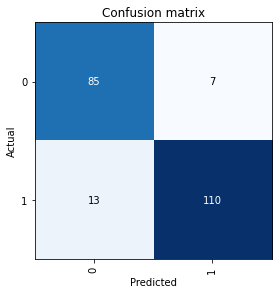

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.save('TB_10')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_10.pth')

In [ ]:
import gc
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(450), bs=32, batch_tfms=tfms)

SuggestedLRs(lr_min=0.0005754399579018354, lr_steep=2.75422871709452e-06)

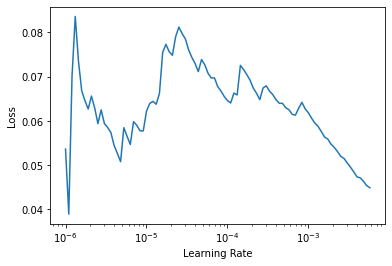

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], normalize=False)
learn.load('TB_9')
# learn.freeze_to(-1)  #The first n layer groups will be frozen and the last n layer groups will be unfrozen.
# learn.unfreeze()
learn.lr_find(1e-6, 1e-2)

In [ ]:
learn.fit_one_cycle(5, 0.0005754399579018354)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.048949,1.007004,0.553488,0.446512,00:16
1,0.039560,0.239845,0.920930,0.079070,00:15
2,0.045830,0.271338,0.925581,0.074419,00:15
3,0.036285,0.250968,0.930233,0.069767,00:15
4,0.031583,0.247520,0.925581,0.074419,00:15


In [ ]:
learn.save('TB_11')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_11.pth')

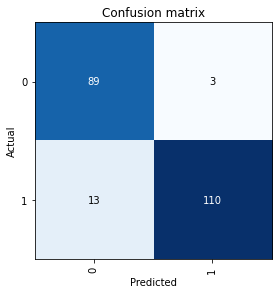

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

SuggestedLRs(lr_min=2.511886350475834e-07, lr_steep=2.75422871709452e-06)

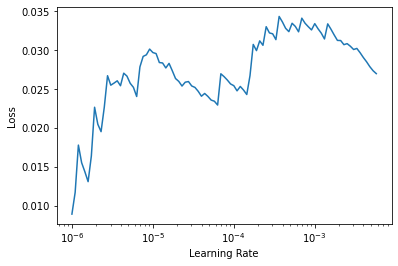

In [ ]:
learn.lr_find(1e-6, 1e-2)

In [ ]:
learn.fit_one_cycle(5, 2.511886350475834e-07)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.027838,0.250675,0.925581,0.074419,00:16
1,0.032028,0.244710,0.925581,0.074419,00:16
2,0.033781,0.238580,0.925581,0.074419,00:16
3,0.028825,0.236181,0.934884,0.065116,00:15
4,0.028415,0.244037,0.925581,0.074419,00:15


In [ ]:
learn.save('TB_12')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_12.pth')

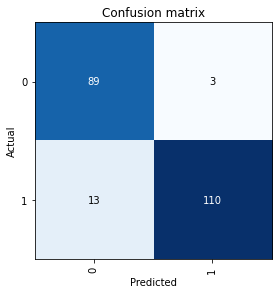

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
# tfms = setup_aug_tfms([Contrast(p=1., max_lighting=.7, draw=1.3),
#                        Brightness(p=1., max_lighting=0.3, draw=0.2),
#                        Zoom(min_zoom=1.0,  max_zoom=1.0, p=1., draw=1.1, draw_x=0.5, draw_y=0.5),
#                        Rotate(max_deg=10, p=0.5),
#                        Warp(magnitude=0.2, p=0.5)])
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=tfms, num_workers=4)
# dls.show_batch()

SuggestedLRs(lr_min=7.585776038467884e-05, lr_steep=2.5118863504758338e-06)

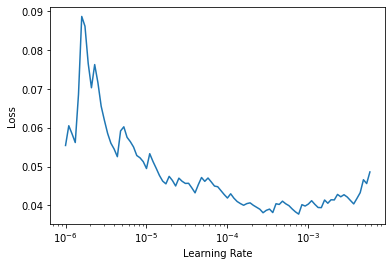

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], normalize=False)
learn.load('TB_12')
learn.lr_find(1e-6, 1e-2)

In [ ]:
learn.fit_one_cycle(6, 7.585776038467884e-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.059852,0.301256,0.916279,0.083721,00:20
1,0.054388,0.309457,0.916279,0.083721,00:18
2,0.048062,0.332753,0.916279,0.083721,00:18
3,0.044886,0.308969,0.920930,0.079070,00:18
4,0.039579,0.304212,0.920930,0.079070,00:18
5,0.039880,0.307637,0.920930,0.079070,00:18


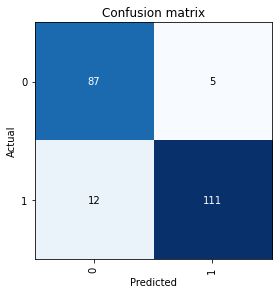

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

SuggestedLRs(lr_min=1.0964782268274575e-05, lr_steep=1.0964781722577754e-06)

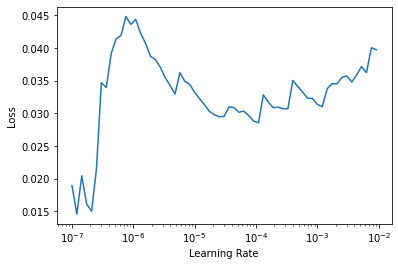

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 1.0964782268274575e-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.042858,0.311852,0.920930,0.079070,00:18
1,0.038886,0.297177,0.920930,0.079070,00:18
2,0.034639,0.300383,0.920930,0.079070,00:18
3,0.032840,0.299461,0.920930,0.079070,00:18
4,0.030194,0.305407,0.925581,0.074419,00:19


In [ ]:
learn.save('TB_13')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_13.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=tfms, num_workers=4)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], normalize=False)
learn.load('TB_13')

In [ ]:
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.2 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(512), bs=32, batch_tfms=aug_transforms(), num_workers=4)

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(450), bs=32, batch_tfms=tfms)
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], normalize=False)
learn.load('TB_11')
learn.fit_one_cycle(10, 0.0005754399579018354) #same lr for TB_11

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.026210,0.259783,0.925581,0.074419,00:18
1,0.026608,0.269587,0.934884,0.065116,00:15
2,0.025868,0.258105,0.934884,0.065116,00:15
3,0.030330,0.383245,0.911628,0.088372,00:15
4,0.032809,0.280303,0.930233,0.069767,00:15
5,0.027249,0.309915,0.934884,0.065116,00:15
6,0.023900,0.298615,0.939535,0.060465,00:15
7,0.019997,0.294417,0.939535,0.060465,00:16
8,0.017113,0.297737,0.939535,0.060465,00:15
9,0.018182,0.291493,0.939535,0.060465,00:16


In [ ]:
learn.save('TB_14')

Path('gdrive/My Drive/Colab Notebooks/zindi/train/models/TB_14.pth')

In [ ]:
tfms = setup_aug_tfms([Contrast(p=0.9, max_lighting=0.5)])
dls = ImageDataLoaders.from_df(df, path/'train', valid_pct=0.3 ,seed=42, fn_col=0, label_col=2, 
                               item_tfms=Resize(450), bs=32, batch_tfms=aug_transforms(mult=2, xtra_tfms=tfms))
learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], normalize=False)
learn.load('TB_14')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
test_df=pd.read_csv(path/'Test.csv')
test_df.insert(2, 'LABEL','')

In [ ]:
for index, row in test_df.iterrows():
    pred,_,probs = learn.predict(path/row['filename'])
    row['LABEL'] = probs[1].item()
  
test_df.drop(['filename'], axis=1, inplace=True)
test_df.to_csv('submission_13-TB_14.csv', index=False)
!cp submission_13-TB_14.csv 'gdrive/My Drive/Colab Notebooks/zindi'